In [204]:
import numpy as np  
import pandas as pd

covid_df = pd.read_csv("covid19.csv")

covid_df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,15/05/2020,15,5,2020,113,6,Afghanistan,AF,AFG,37172386.0,Asia
1,14/05/2020,14,5,2020,259,3,Afghanistan,AF,AFG,37172386.0,Asia
2,13/05/2020,13,5,2020,280,5,Afghanistan,AF,AFG,37172386.0,Asia
3,12/05/2020,12,5,2020,285,2,Afghanistan,AF,AFG,37172386.0,Asia
4,11/05/2020,11,5,2020,369,5,Afghanistan,AF,AFG,37172386.0,Asia


In [49]:
covid_df.shape

(17158, 11)

In [205]:
covid_df.drop(['dateRep','geoId','countryterritoryCode','popData2018'], axis=1, inplace=True)
covid_df.rename(columns={'countriesAndTerritories':'country','continentExp':'continent'}, inplace=True)

covid_df.head()

,day,month,year,cases,deaths,country,continent
0,15,5,2020,113,6,Afghanistan,Asia
1,14,5,2020,259,3,Afghanistan,Asia
2,13,5,2020,280,5,Afghanistan,Asia
3,12,5,2020,285,2,Afghanistan,Asia
4,11,5,2020,369,5,Afghanistan,Asia


In [206]:
# create a new date column (year-month)
covid_df['date'] = covid_df['year'].astype(str)+'-'+covid_df['month'].astype(str)+'-'+covid_df['day'].astype(str)

covid_df.drop(['month','year','day'], axis=1, inplace=True)

covid_df.head()

,cases,deaths,country,continent,date
0,113,6,Afghanistan,Asia,2020-5-15
1,259,3,Afghanistan,Asia,2020-5-14
2,280,5,Afghanistan,Asia,2020-5-13
3,285,2,Afghanistan,Asia,2020-5-12
4,369,5,Afghanistan,Asia,2020-5-11


In [219]:
# group by columns based on country and date
df = covid_df[['country', 'date','cases']].groupby(['country','date']).sum().reset_index()

df.head()

,country,date,cases
0,Afghanistan,2019-12-31,0
1,Afghanistan,2020-1-1,0
2,Afghanistan,2020-1-10,0
3,Afghanistan,2020-1-11,0
4,Afghanistan,2020-1-12,0


In [233]:
# make dataframe with columns of country, 2020-5, 2020-4, 2020-3, 2020-2, 2020-1, 2019-12
data = []

countries_list = covid_df['country'].unique().tolist()

dates = covid_df['date'].unique().tolist()
dates.reverse()

for country in countries_list:
    dic = {}
    dic['country'] = country
    for date in dates:
        c = df[(df.country == country) & (df.date == date)]['cases']
        if len(c)==0:
            dic[date] = 0
        else:
            dic[date] = int(c)
    data.append(dic)

new_df = pd.DataFrame(data) 


new_df.head()


,country,2020-3-7,2020-3-3,2020-3-4,2020-3-5,2020-3-6,2020-3-9,2020-3-10,2020-3-12,2020-3-13,...,2020-5-6,2020-5-7,2020-5-8,2020-5-9,2020-5-10,2020-5-11,2020-5-12,2020-5-13,2020-5-14,2020-5-15
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,330,168,171,215,255,369,285,280,259,113
1,Albania,0,0,0,0,0,2,4,1,12,...,17,12,10,8,6,12,4,4,4,18
2,Algeria,0,0,2,7,5,3,0,0,5,...,190,159,185,187,189,165,168,176,186,189
3,Andorra,0,1,0,0,0,0,0,0,0,...,1,0,1,0,2,1,1,2,2,1
4,Angola,0,0,0,0,0,0,0,0,0,...,1,0,0,7,0,2,0,0,0,3


In [234]:
# set index by country column
new_df.set_index('country', inplace=True)

new_df.head()

,2020-3-7,2020-3-3,2020-3-4,2020-3-5,2020-3-6,2020-3-9,2020-3-10,2020-3-12,2020-3-13,2020-3-14,...,2020-5-6,2020-5-7,2020-5-8,2020-5-9,2020-5-10,2020-5-11,2020-5-12,2020-5-13,2020-5-14,2020-5-15
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,330,168,171,215,255,369,285,280,259,113
Albania,0,0,0,0,0,2,4,1,12,10,...,17,12,10,8,6,12,4,4,4,18
Algeria,0,0,2,7,5,3,0,0,5,1,...,190,159,185,187,189,165,168,176,186,189
Andorra,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,2,1,1,2,2,1
Angola,0,0,0,0,0,0,0,0,0,0,...,1,0,0,7,0,2,0,0,0,3


In [236]:
# calculate total cases
new_df['total'] = new_df.sum(axis=1)

# sort rows based on total cases
new_df.sort_values(by='total', ascending=False, axis=0, inplace=True)


,total,2020-4-26,2020-5-15,2020-5-8,2020-5-2,2020-5-10,2020-5-9,2020-5-7,2020-4-11,2020-5-14,...,2020-1-6,2020-1-10,2020-1-4,2020-1-11,2020-1-2,2020-1-1,2020-1-12,2020-1-14,2020-1-16,2020-1-9
country,,,,,,,,,,,,,,,,,,,,,
United_States_of_America,1417889,48529,27143,28369,33955,25612,26957,24128,35527,20782,...,0,0,0,0,0,0,0,0,0,0
Russia,252245,5966,9974,11231,7933,10817,10699,10559,1786,10028,...,0,0,0,0,0,0,0,0,0,0
United_Kingdom,233151,4913,3446,5514,6201,3896,4649,6211,5195,3242,...,0,0,0,0,0,0,0,0,0,0
Spain,229540,1641,0,1173,1234,3416,743,921,4550,849,...,0,0,0,0,0,0,0,0,0,0
Italy,223096,2357,992,1401,1965,1083,1327,1444,3951,888,...,0,0,0,0,0,0,0,0,0,0


In [237]:
# top5 countries
top5 = new_df.head(5)
top5 = top5.loc[:,dates]
top5 = top5.transpose()
top5.sort_index(inplace=True)

top5.tail()

country,United_States_of_America,Russia,United_Kingdom,Spain,Italy
2020-5-5,22593,10581,3985,1039,1221
2020-5-6,23841,10102,4406,880,1075
2020-5-7,24128,10559,6211,921,1444
2020-5-8,28369,11231,5514,1173,1401
2020-5-9,26957,10699,4649,743,1327


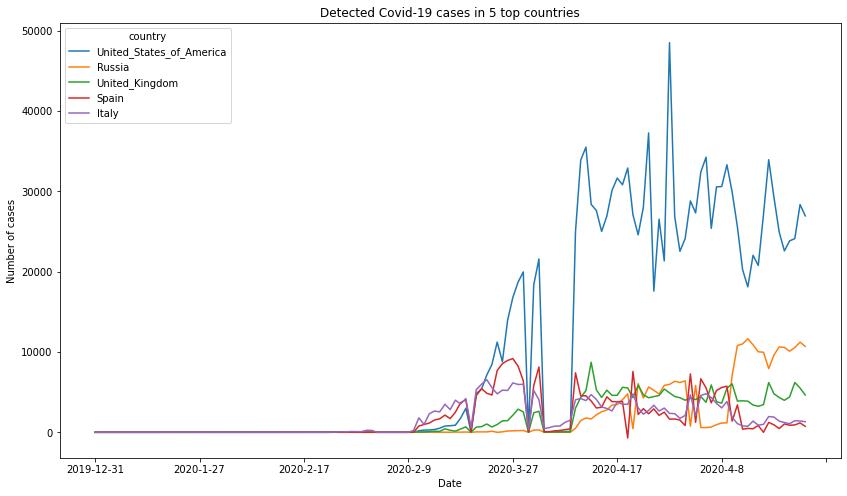

In [238]:
import matplotlib as mpl
import matplotlib.pyplot as plt

top5.plot(kind='line', figsize=(14, 8))

plt.title('Detected Covid-19 cases in 5 top countries')
plt.ylabel('Number of cases')
plt.xlabel('Date')

plt.show()

In [242]:
# Cases in Iran
# new_df.head()
Iran_df = new_df.col['Iran']
# Iran_df = Iran_df.loc[:,dates]
# Iran_df = Iran_df.transpose()
# top5.sort_index(inplace=True)

# Iran_df.head()

AttributeError: 'DataFrame' object has no attribute 'col'

In [72]:
Iran_df.set_index('date', inplace=True)
Iran_df.tail()

,month,year,cases,deaths,country,continent
date,,,,,,
2020_5,5,2020,976,47,Iran,Asia
2020_5,5,2020,802,65,Iran,Asia
2020_5,5,2020,1006,63,Iran,Asia
2020_5,5,2020,1485,68,Iran,Asia
2020_5,5,2020,1808,71,Iran,Asia


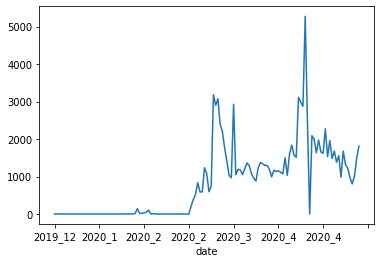

In [69]:
Iran_df.cases.plot(kind='line')

In [45]:
country_df = covid_df[['cases', 'deaths','country']].groupby('country', axis=0).sum()
country_df.sort_values(by='cases', ascending=False, inplace=True)
country_df.head() 

,cases,deaths
country,,
United_States_of_America,1417889,85906
Russia,252245,2305
United_Kingdom,233151,33614
Spain,229540,27321
Italy,223096,31368
